In [2]:
import pymysql
import sqlalchemy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sqlalchemy import create_engine

# Database connection parameters
DATABASE_TYPE = 'mysql'      # or 'postgresql', 'sqlite', etc.
DBAPI = 'pymysql'            # or 'psycopg2' for PostgreSQL, 'sqlite3' for SQLite
HOST = 'localhost'           # Database server address or IP
USER = 'root'            # Your database username
PASSWORD = '$sql.26'        # Your database password
DATABASE = 'media_interaction_db'   # Your database name
PORT = 3306                  # Default MySQL port (use appropriate port for other databases)

# Create SQLAlchemy engine
engine = create_engine(f'{DATABASE_TYPE}+{DBAPI}://{USER}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}')

In [4]:
# Test connection by listing available tables
with engine.connect() as connection:
    result = connection.execute("SHOW TABLES;")  # For MySQL; use appropriate query for other DBs
    tables = result.fetchall()
    print("Tables in the database:", tables)

Tables in the database: [('media_interaction_data',)]


In [5]:
import pandas as pd

In [6]:
#the query to be analysed ----------AVERAGE RETWEETS BY SENTIMENT---------------------
query="""
select SENTIMENT, AVG(RETWEETS) as AVG_RETWEETS
from media_interaction_data
group by SENTIMENT
order by AVG_RETWEETS desc
limit 20;
"""
#import data into dataframe
df=pd.read_sql(query,engine)

#see first few rows of data
print(df)

            SENTIMENT  AVG_RETWEETS
0       Wonder                 40.0
1        Mesmerizing           40.0
2      Anticipation            40.0
3         Wonder               40.0
4      Thrill                  40.0
5      Motivation              40.0
6             Energy           35.0
7            Emotion           35.0
8         Harmony              35.0
9    CulinaryOdyssey           35.0
10     Wonderment              35.0
11     Harmony                 35.0
12        Exhaustion           35.0
13        Resilience           35.0
14      Resilience             35.0
15       Gratitude             35.0
16              Love           35.0
17     Mindfulness             35.0
18     InnerJourney            35.0
19        Enthusiasm           35.0


In [7]:
pd.set_option('display.max_rows',279)

In [8]:
print(df)

            SENTIMENT  AVG_RETWEETS
0       Wonder                 40.0
1        Mesmerizing           40.0
2      Anticipation            40.0
3         Wonder               40.0
4      Thrill                  40.0
5      Motivation              40.0
6             Energy           35.0
7            Emotion           35.0
8         Harmony              35.0
9    CulinaryOdyssey           35.0
10     Wonderment              35.0
11     Harmony                 35.0
12        Exhaustion           35.0
13        Resilience           35.0
14      Resilience             35.0
15       Gratitude             35.0
16              Love           35.0
17     Mindfulness             35.0
18     InnerJourney            35.0
19        Enthusiasm           35.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_5388\120246206.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SENTIMENT',y='AVG_RETWEETS',data=df, ci=None,width=0.5)


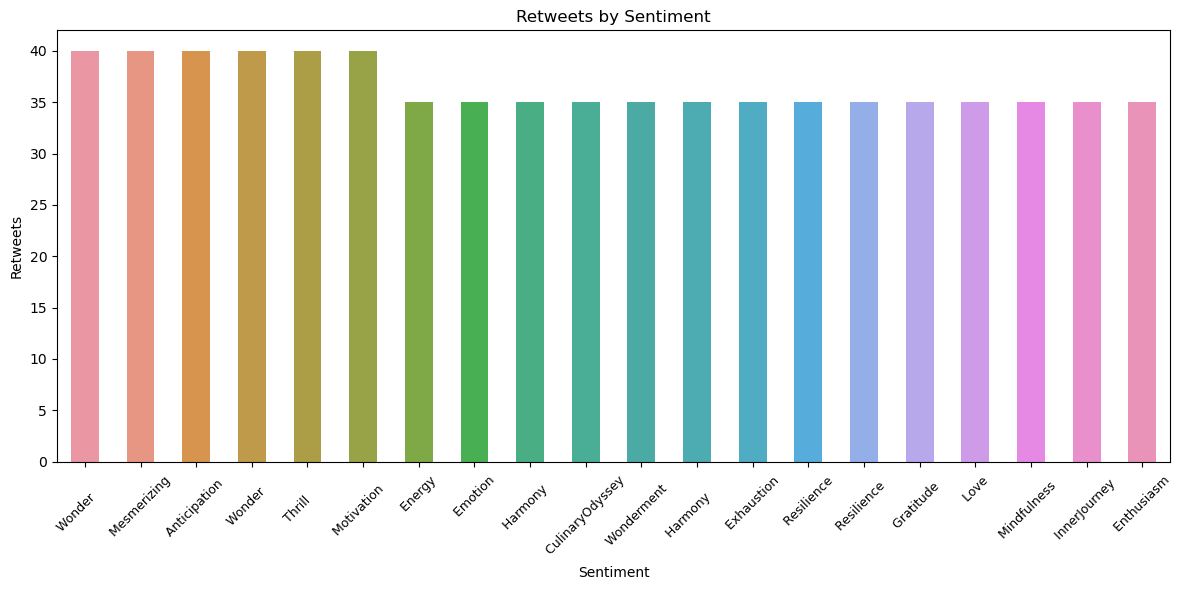

In [9]:
#creating box plot
plt.figure(figsize=(12, 6)) 
sns.barplot(x='SENTIMENT',y='AVG_RETWEETS',data=df, ci=None,width=0.5)
plt.title('Retweets by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Retweets')
plt.xticks(rotation=45,fontsize=9)
plt.tight_layout()
plt.show()

In [10]:
#RETWEETS BY PLATFORM AND YEAR
query2="""
SELECT PLATFORM, YEAR ,AVG(RETWEETS) as AVG_RETWEETS
from media_interaction_data
group by YEAR, PLATFORM
order by year DESC , AVG_RETWEETS desc, PLATFORM
limit 20;
"""
df2=pd.read_sql(query2,engine)
print(df2)

       PLATFORM  YEAR  AVG_RETWEETS
0    Instagram   2023       22.5158
1      Twitter   2023       22.4915
2     Facebook   2023       20.7473
3     Twitter    2023       18.0455
4     Facebook   2022       22.1500
5    Instagram   2022       21.7000
6      Twitter   2022       21.0000
7     Twitter    2022       21.0000
8    Instagram   2021       22.3913
9     Facebook   2021       22.2857
10     Twitter   2021       20.6667
11    Twitter    2021       16.8462
12     Twitter   2020       24.4545
13   Instagram   2020       22.0370
14    Facebook   2020       19.9200
15    Twitter    2020       16.0000
16     Twitter   2019       24.2353
17   Instagram   2019       23.4444
18    Facebook   2019       19.6000
19    Twitter    2019       19.4286


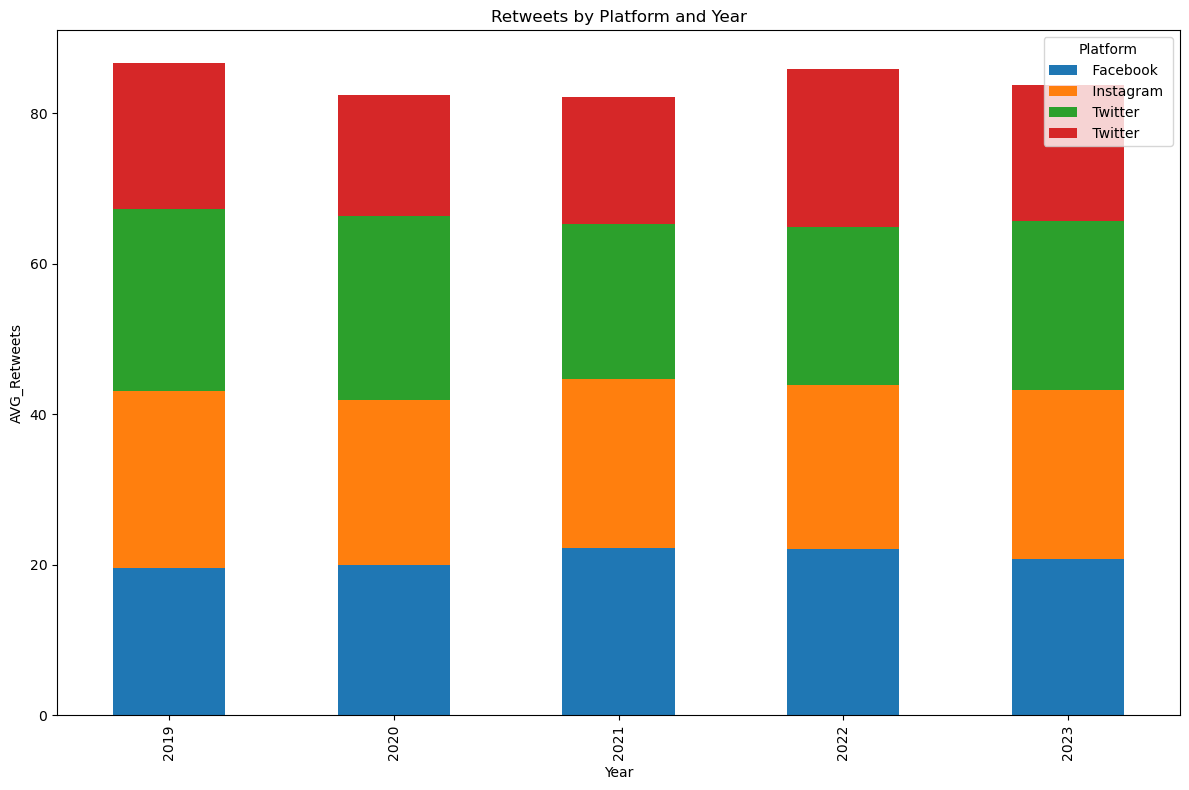

In [11]:
#RETWEETS BY PLATFORM AND YEAR using stacked bar plot
stack_df = df2.pivot_table(values='AVG_RETWEETS', index='YEAR', columns='PLATFORM', aggfunc='sum')
stack_df.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Retweets by Platform and Year')
plt.xlabel('Year')
plt.ylabel('AVG_Retweets')
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

In [12]:
##-----------------TOP HASHTAGS BY RETWEETS--------------------------------------
query3="""
select HASHTAGS , AVG(RETWEETS) as AVG_RETWEETS
from media_interaction_data
group by HASHTAGS
order by AVG_RETWEETS desc
limit 20;
"""
df3=pd.read_sql(query3,engine)
print(df3)

                                        HASHTAGS  AVG_RETWEETS
0      #Elation #RareBookDiscovery                        40.0
1                           #Joy #EndlessSmiles           40.0
2     #Thrill #CulturalCelebration                        40.0
3     #Motivation #FitnessGoals                           40.0
4                        #Emotion #AdeleConcert           40.0
5           #Mesmerizing #NightDancePerformance           40.0
6        #Despair #AbyssOfHeartache                       40.0
7                    #Tranquility #SunsetBeauty           40.0
8      #Anticipation #AdventureAwaits                     40.0
9                         #Joy #WorldCupTriumph           40.0
10                    #Enthusiasm #JustinBieber           40.0
11               #Disappointment #SoccerDefeats           40.0
12            #Excitement #MoviePremiereThrills           40.0
13                          #Joy #SimpleMoments           40.0
14      #Wonder #StargazingAdventure                   

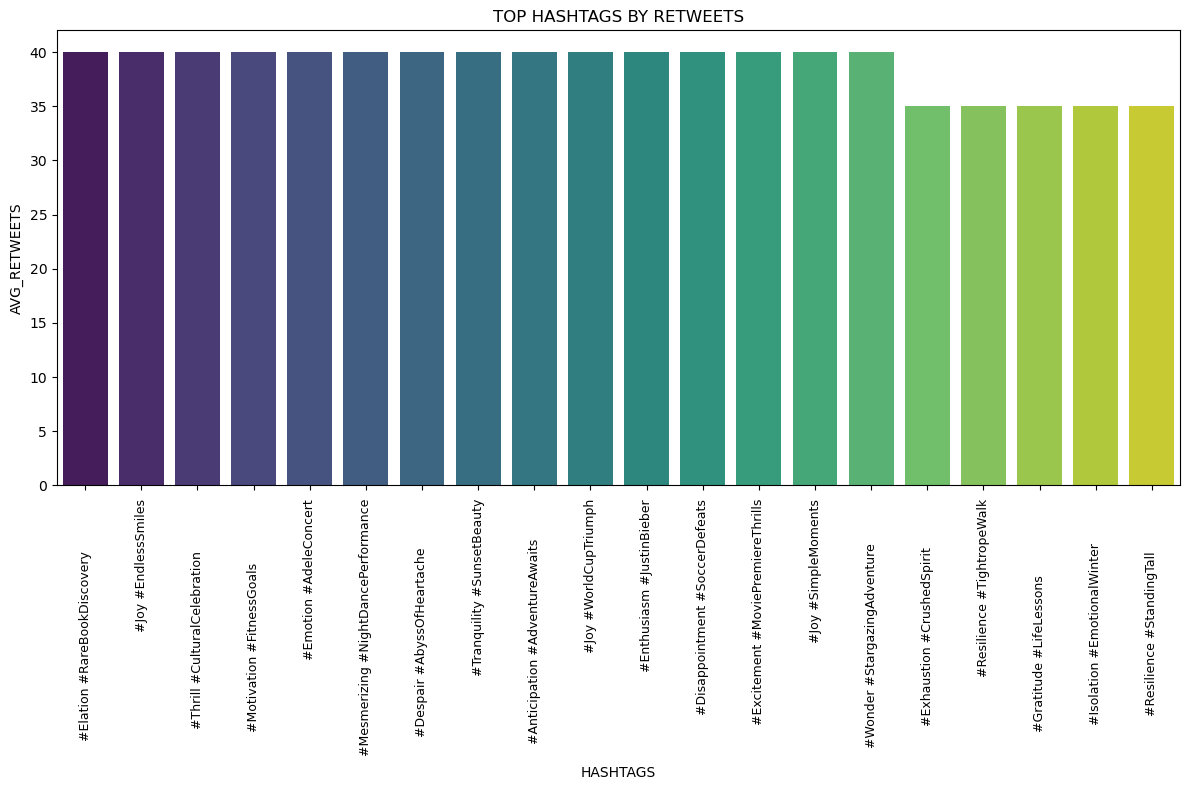

In [13]:
#using Horizontal Line plot
plt.figure(figsize=(12,8))
sns.barplot(x='HASHTAGS',y='AVG_RETWEETS',data=df3,palette='viridis')
plt.xlabel('HASHTAGS')
plt.ylabel('AVG_RETWEETS')
plt.title('TOP HASHTAGS BY RETWEETS')
plt.xticks(rotation=90,fontsize=9)
plt.tight_layout()
plt.show()

In [14]:
#-----------------------------CONTENT TYPE, SENTIMENT BY COUNTRY-------------------------
query4="""
select TEXT,SENTIMENT,COUNTRY,COUNT(*) as COUNT
from media_interaction_data
group by COUNTRY, TEXT, SENTIMENT
order by TEXT, SENTIMENT
limit 10;
"""
df4=pd.read_sql(query4,engine)
print(df4)

                                                TEXT          SENTIMENT  \
0   A bitter experience turned into a valuable le...      Bitter          
1   A compassionate rain, tears of empathy fallin...     Compassionate    
2   A cozy evening with a good movie.            ...         Positive     
3   A fiery determination burning within, fueled ...   Determination      
4   A free spirit soaring on the wings of dreams,...     Free-spirited    
5   A heart overflowing with gratitude, a garden ...          Grateful    
6   A journey into the past, flipping through the...   Nostalgia          
7   A melancholic symphony playing in the backgro...   Melancholy         
8   A moment of shame for not speaking up against...      Shame           
9   A moment of shame for not standing up against...      Shame           

           COUNTRY  COUNT  
0       USA             2  
1          Canada       6  
2        Canada         2  
3   UK                  2  
4              UK       4  
5     

NameError: name 'COUNTRY' is not defined

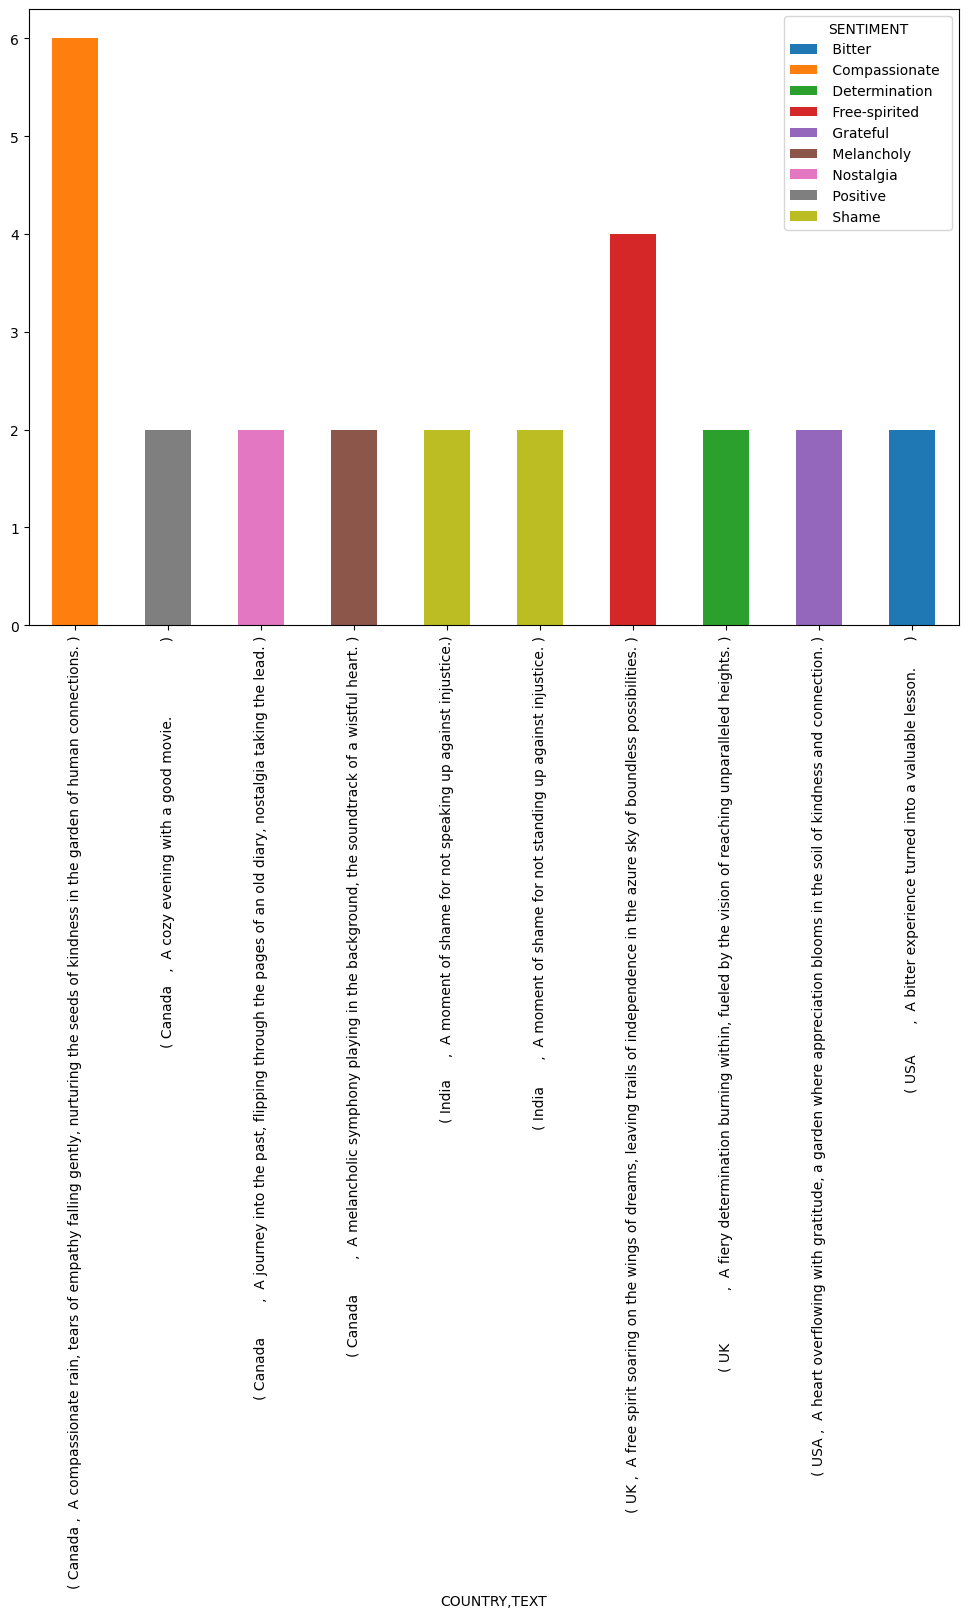

In [15]:
#using stacked bar plot
plot_df=df4.pivot_table(values='COUNT',index=['COUNTRY','TEXT'],columns='SENTIMENT',aggfunc='sum')
plot_df.plot(kind='bar',stacked='True',figsize=(12,8))
labels=[f'{COUNTRY}\n{TEXT}' for COUNRTY,TEXT in plot_df.index]
ax.set_xticklabels(new_labels, rotation=0, ha='center')
plt.xlabel('')
plt.ylabel('')
plt.title('CONTENT TYPE, SENTIMENT BY COUNTRY')
plt.xticks(rotation=90,fontsize=7)
plt.tight_layout()
plt.show()

In [16]:
#---------------------SENTIMENT TRENDS OVERTIME-----------------------------
query5="""
select SENTIMENT,year,COUNT(*) as COUNT
from media_interaction_data
group by year,SENTIMENT
order by year desc,SENTIMENT
limit 200;
"""
df5=pd.read_sql(query5,engine)
print(df5)

                  SENTIMENT  year  COUNT
0             Acceptance     2023      6
1          Acceptance        2023      6
2             Admiration     2023      4
3             Adoration      2023      4
4             Affection      2023      4
5                Amazement   2023      2
6             Amusement      2023      4
7             Anger          2023      4
8             Anticipation   2023      4
9             Apprehensive   2023      2
10            Awe            2023      4
11                     Bad   2023     12
12            Bitter         2023      6
13                 Boredom   2023      2
14            Calmness       2023      6
15               Confusion   2023      2
16            Confusion      2023      4
17             Contentment   2023     18
18           Contentment     2023      2
19    Creative Inspiration   2023      2
20               Curiosity   2023     12
21         Curiosity         2023      2
22           Determination   2023      2
23            Di

In [17]:
print(df5['SENTIMENT'].unique())

[' Acceptance   ' ' Acceptance      ' ' Admiration   ' ' Adoration    '
 ' Affection    ' ' Amazement ' ' Amusement    ' ' Anger        '
 ' Anticipation ' ' Apprehensive ' ' Awe          ' ' Bad '
 ' Bitter       ' ' Boredom ' ' Calmness     ' ' Confusion '
 ' Confusion    ' ' Contentment ' ' Contentment   '
 ' Creative Inspiration ' ' Curiosity ' ' Curiosity       '
 ' Determination ' ' Disappointed ' ' Disgust ' ' Disgust      '
 ' Ecstasy ' ' Embarrassed ' ' Empathetic ' ' Enjoyment    ' ' Euphoria '
 ' Excitement ' ' Excitement   ' ' Excitement    ' ' Fear         '
 ' Fearful ' ' Frustration ' ' Grateful ' ' Gratitude ' ' Gratitude    '
 ' Grief ' ' Happiness    ' ' Happy ' ' Hate ' ' Hopeful '
 ' Indifference ' ' Indifference    ' ' Joy ' ' Joy          '
 ' Joy in Baking ' ' Kind         ' ' Loss ' ' Love         '
 ' Mischievous ' ' Negative  ' ' Neutral ' ' Neutral   ' ' Pensive '
 ' Positive ' ' Positive  ' ' Pride ' ' Pride        ' ' Reflection    '
 ' Relief ' ' Sad ' ' S

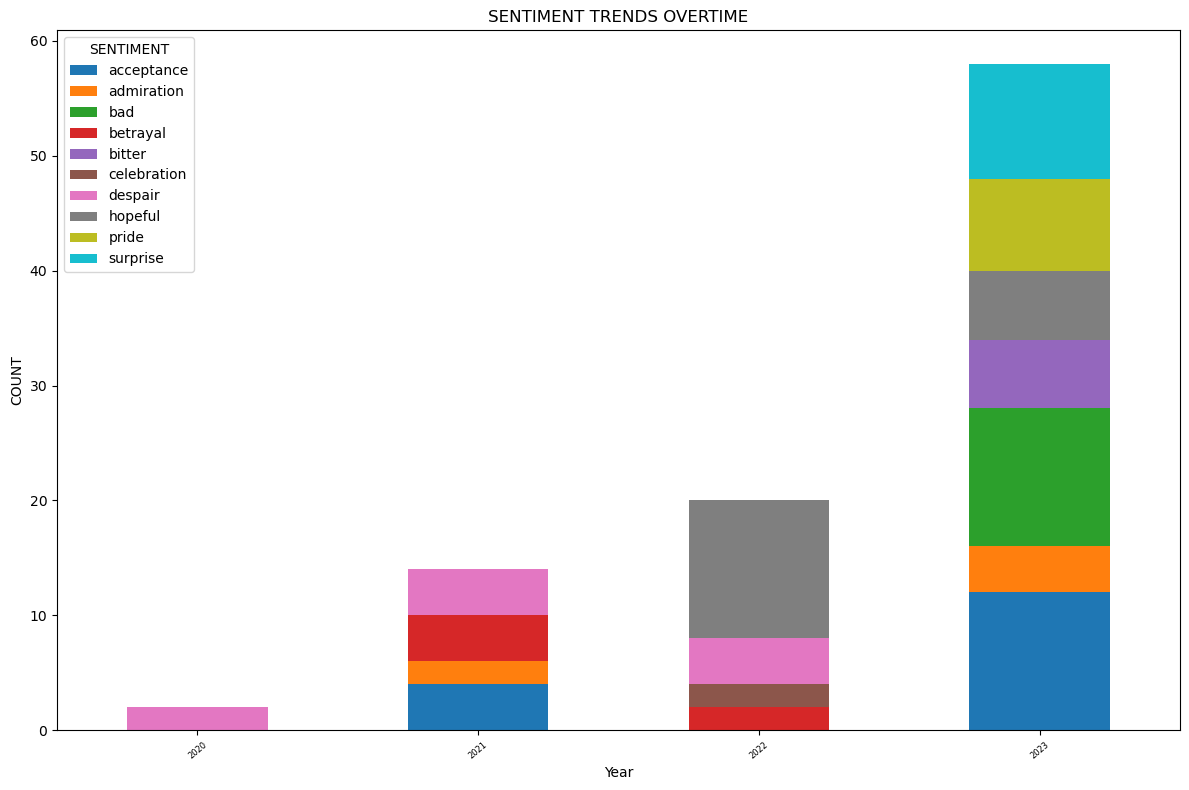

In [18]:
df5['SENTIMENT'] = df5['SENTIMENT'].str.strip().str.lower()

select_senti=[senti.lower() for senti in['Despair','Celebration','Betrayal','Surprise','Acceptance',
                                         'Admiration','Bitter','Bad','Pride','Hopeful']]

filtered_df = df5[df5['SENTIMENT'].isin(select_senti)]

if filtered_df.empty:
    print("No data available for the selected sentiments.")
else:
    senti_df = filtered_df.pivot_table(values='COUNT', index='year', columns='SENTIMENT', aggfunc='sum')
    senti_df.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('SENTIMENT TRENDS OVERTIME')
plt.xlabel('Year')
plt.ylabel('COUNT')
plt.legend(title='SENTIMENT')
plt.xticks(rotation=40,fontsize=6)
plt.tight_layout()
plt.show()

In [19]:
#-------------------------SENTIMENT WITH HIGHEST RETWEET OVERTIME-------------------
query6="""
select SENTIMENT, year ,AVG(RETWEETS) as AVG_RETWEETS
from media_interaction_data
group by year, SENTIMENT
order BY year desc, AVG_RETWEETS desc, SENTIMENT
limit 200;
"""
df6=pd.read_sql(query6,engine)
print(df6)

                  SENTIMENT  year  AVG_RETWEETS
0                  Ecstasy   2023       35.0000
1                 Euphoria   2023       35.0000
2                Amazement   2023       30.0000
3                Confusion   2023       30.0000
4            Excitement      2023       30.0000
5                    Grief   2023       30.0000
6             Happiness      2023       30.0000
7              Mischievous   2023       29.0000
8                     Loss   2023       28.0000
9                 Positive   2023       28.0000
10            Satisfaction   2023       28.0000
11               Gratitude   2023       27.5000
12             Contentment   2023       27.1111
13            Confusion      2023       25.0000
14           Contentment     2023       25.0000
15               Curiosity   2023       25.0000
16            Enjoyment      2023       25.0000
17                   Pride   2023       25.0000
18            Sadness        2023       25.0000
19            Surprise       2023       

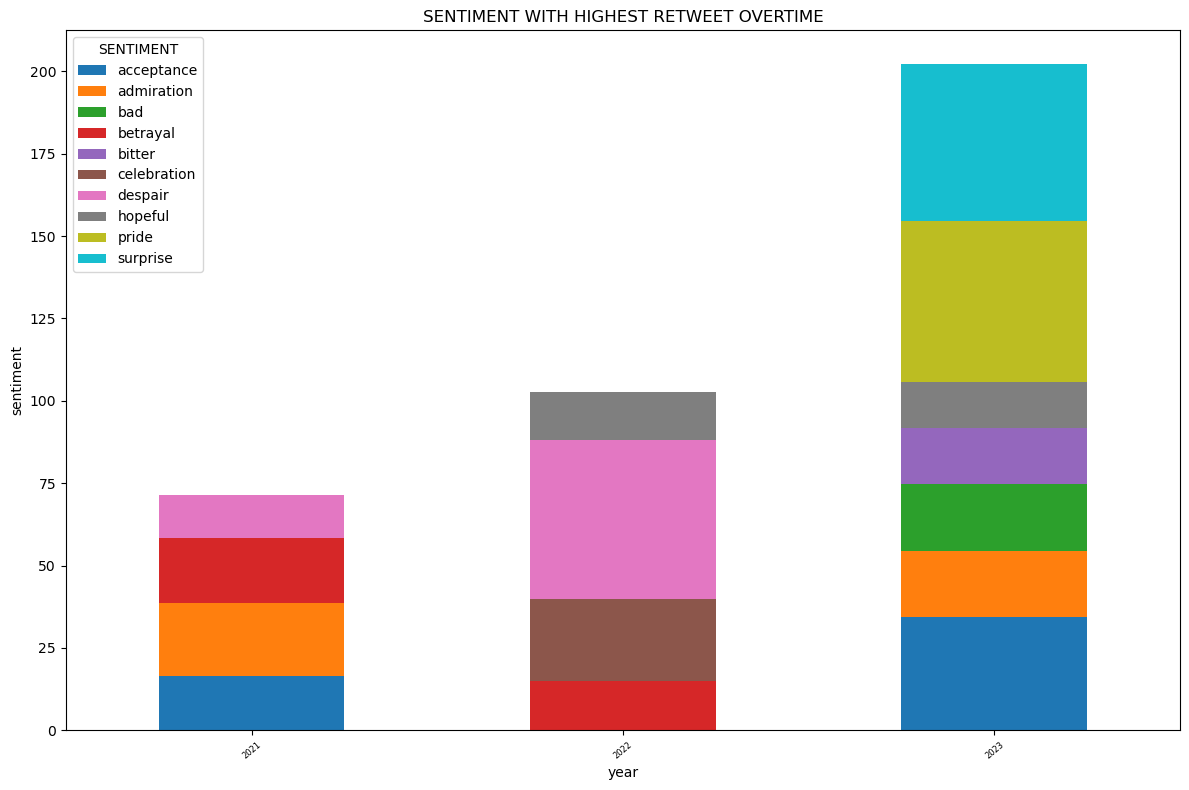

In [20]:
#USING STACKED BAR GARPH
df6['SENTIMENT'] = df6['SENTIMENT'].str.strip().str.lower()

selectd_senti=[senti.lower() for senti in['Despair','Celebration','Betrayal','Surprise','Acceptance',
                                         'Admiration','Bitter','Bad','Pride','Hopeful']]

filter_df = df6[df6['SENTIMENT'].isin(selectd_senti)]

if filter_df.empty:
    print("No data available for the selected sentiments.")
else:
    sentiment_df = filter_df.pivot_table(values='AVG_RETWEETS', index='year', columns='SENTIMENT', aggfunc='sum')
    sentiment_df.plot(kind='bar', stacked=True, figsize=(12, 8))
    
plt.title('SENTIMENT WITH HIGHEST RETWEET OVERTIME')
plt.xlabel('year')
plt.ylabel('sentiment')
plt.legend(title='SENTIMENT')
plt.xticks(rotation=40,fontsize=6)
plt.tight_layout()
plt.show()

In [21]:
#-----------------------------MAXIMUM RETWEETS ON COUNTRY BY YEAR-------------
query7="""
select year, COUNTRY, AVG(RETWEETS) as AVG_RETWEETS
from media_interaction_data
group by year, COUNTRY
order by year desc,AVG_RETWEETS desc, COUNTRY
"""
df7=pd.read_sql(query7,engine)
print(df7)

     year               COUNTRY  AVG_RETWEETS
0    2023   Australia                    30.0
1    2023    France                      30.0
2    2023               Jordan           30.0
3    2023                USA             30.0
4    2023         Canada                 25.0
..    ...                   ...           ...
275  2011           Canada               22.0
276  2011          UK                    22.0
277  2010            Australia           30.0
278  2010             India              30.0
279  2010            Canada              20.0

[280 rows x 3 columns]


C:\Users\DELL\AppData\Local\Temp\ipykernel_5388\1299054222.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


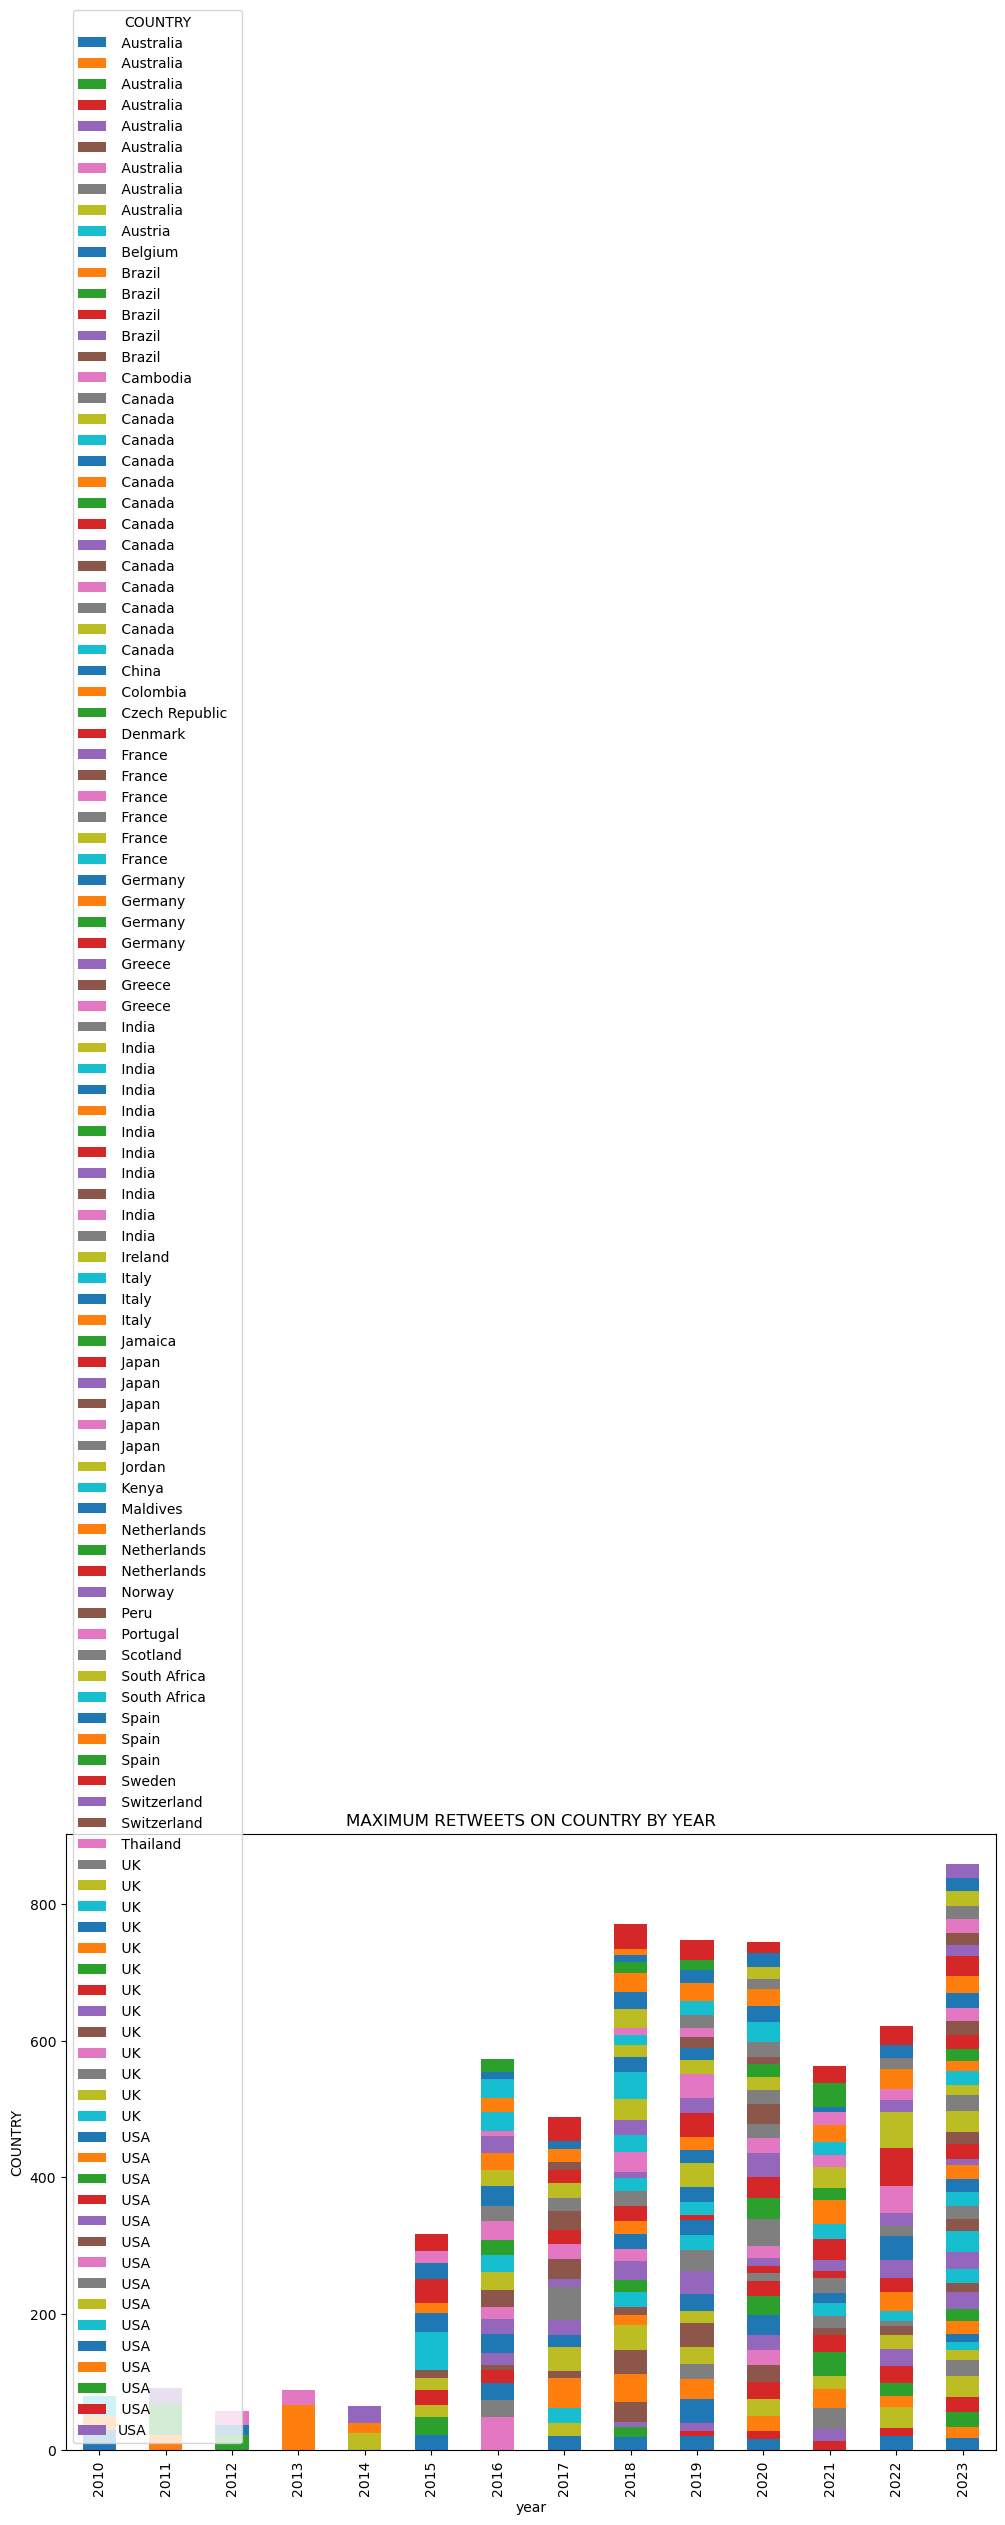

In [23]:
#using stacked bar plot
max_tweet=df7.pivot_table(values='AVG_RETWEETS',index='year',columns='COUNTRY',aggfunc='sum')
max_tweet.plot(kind='bar',stacked=True,figsize=(12,8))

plt.title('MAXIMUM RETWEETS ON COUNTRY BY YEAR')
plt.xlabel('year')
plt.ylabel('COUNTRY')
plt.legend(title='COUNTRY')
plt.tight_layout()
plt.show()

In [25]:
#------------------------------LIKES FOR SENTIMENTS BY COUNTRY------------
query8="""
select SENTIMENT, COUNTRY, AVG(LIKES) as AVG_LIKES
from media_interaction_data
group by COUNTRY,SENTIMENT
order by AVG_LIKES desc, COUNTRY, SENTIMENT;
"""
df8=pd.read_sql(query8,engine)
print(df8)

             SENTIMENT               COUNTRY  AVG_LIKES
0       Motivation       Australia                 80.0
1      Disappointment                Brazil        80.0
2                 Joy                Brazil        80.0
3          Enthusiasm                Canada        80.0
4                 Joy                Canada        80.0
..                 ...                   ...        ...
505   Disgust                 UK                   15.0
506         Negative              USA              15.0
507       Jealousy            USA                  15.0
508         Negative               Canada          12.5
509   Despair                  USA                 10.0

[510 rows x 3 columns]


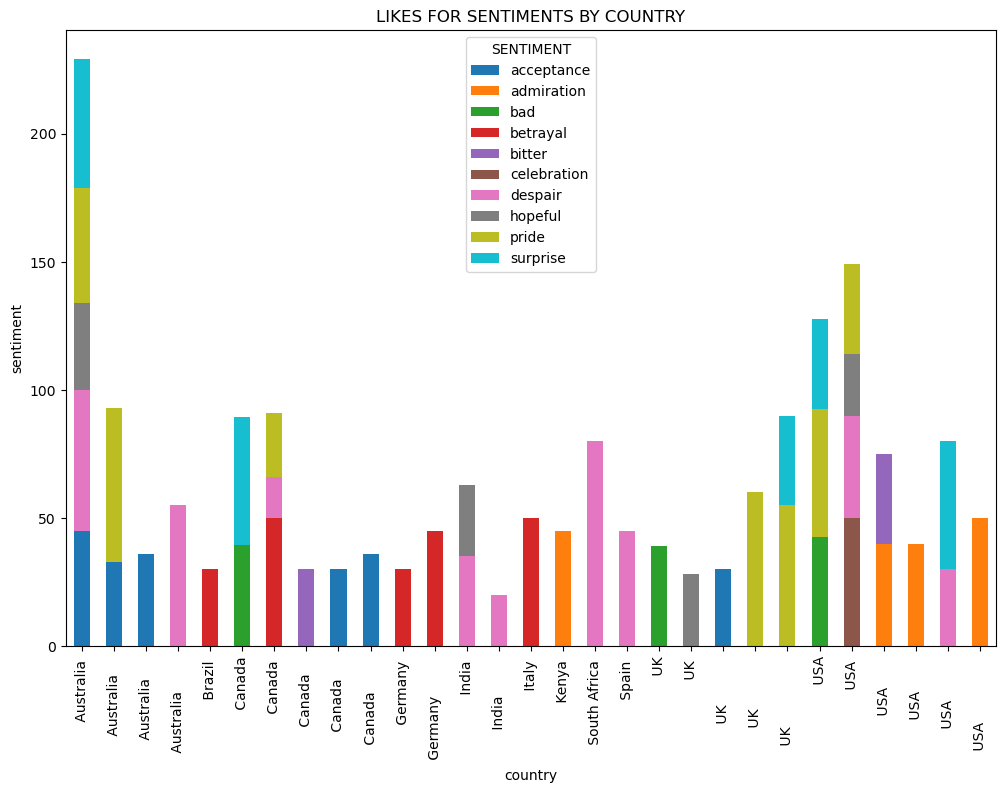

In [29]:
df8['SENTIMENT']=df8['SENTIMENT'].str.strip().str.lower()
selctd_sen=[senti.lower() for senti in['Despair','Celebration','Betrayal','Surprise','Acceptance',
                                         'Admiration','Bitter','Bad','Pride','Hopeful']]
fin_df=df8[df8['SENTIMENT'].isin(selctd_sen)]
if fin_df.empty:
    print('No data available for the selected sentiments.')
else:
    likes_df=fin_df.pivot_table(values='AVG_LIKES',index='COUNTRY',columns='SENTIMENT',aggfunc=sum)
    likes_df.plot(kind='bar',stacked=True, figsize=(12,8))
    
plt.title('LIKES FOR SENTIMENTS BY COUNTRY')
plt.xlabel('country')
plt.ylabel('sentiment')
plt.legend(title='SENTIMENT')
plt.show()